In [70]:
import numpy as np

fm = 1
hbarc = 0.197327053
c = 1  # speed of light
hbar = 1  # reduced Planck constant

GeV = 1 / hbarc  # Giga-electronvolt
MeV = 1e-3 * GeV  # Mega-electronvolt

g = 5.625e26 * MeV  # gram
kg = 1e3 * g  # kilogram
cm = 1e13 * fm  # centimeter
m = 100 * cm  # meter
km = 1e5 * cm  # kilometer
s = 3e10 * cm  # second

dyn = g * cm / s**2  # dyne
dyn_cm_2 = dyn / cm**2  # dyne / cm^2
g_cm_3 = g / cm**3  # gram / cm^3
erg = dyn * cm  # ἐργον energy unit

m_n = 939.565 * MeV  # mass of neutron
n0 = 0.16 / fm**3  # saturation density

e0 = m_n * n0  # saturation energy density
G = 6.6743e-8 * dyn * cm**2 / g**2  # gravitational constant
Msun = 1.989e33 * g  # mass of sun

def MITbag_compute_EOS(B): 
    """
    Compute the energy density and pressure based on the given parameters.

    Args:
        B: Input value of bag constant; MeVfm^-3
        
    Returns:
        tuple: Arrays of energy densities in units of gcm^3 and pressures in units of dyncm^2.
    """
    
    B_cgs = B * (MeV / (fm)**3) # converting input to cgs
    energy_density  = np.linspace(4 * B_cgs, 10 * B_cgs, 1000) # cgs
    # epsilon has a minimum value of 4B so that pressure >= 0
    
    pressure = ((energy_density / 3) - (4 * B_cgs / 3))
    
    return energy_density, pressure

In [1]:
import TOVsolver.main as main
import InferenceWorkflow.prior as prior

In [50]:


#     # Check monotonicity of total energy density and pressure
#     if all(x < y for x, y in zip(epsilon[:-1], epsilon[1:])) and all(x < y for x, y in zip(p[:-1], p[1:])):
#         MR = main.OutputMR('', epsilon, p).T  
#         if MR[1].size == 0:
#             params[1] = 0  # No valid MR
#         else:
#             for i in range(len(MR[1])):
#                 RFSU2R.append(MR[0][i])
#                 MFSU2R.append(MR[1][i])
#                 if i > 20 and MR[1][i] - MR[1][i - 1] < 0:
#                     break

#     # Set d1 parameter based on maximum mass
#     if len(MFSU2R) == 0:
#         params[1] = 0  # No valid MR
#     else:
#         max_index = len(MFSU2R)
#         max_d = np.log10(density[max_index - 1])
#         params[1] = 14.3 + (max_d - 14.3) * cube[1]  # Transform d1 parameter
#     return params



In [51]:
parameters = ['B','d1']

# # def prior_transform(cube):
# #     params = cube.copy()
# #     params[0] = prior.flat_prior(20,100,cube[0])

# #     B = params[0]
    
# #     epsilon,p = MITbag_compute_EOS(B)

# #     RFSU2R = [] 
# #     MFSU2R = []
# #     density = np.logspace(14.3, 15.6, 50) 
# #     if all(x<y for x,y in zip(epsilon[:], epsilon[1:])) and all(x<y for x, y in zip(p[:], p[1:])):
# #         MR = main.OutputMR("",epsilon,p).T  
        
# #     else:
# #         MR = []
# #     if len(MR) == False: 
# #         params[1] = 0
# #         #this line for showing how to add one more observation
# #     else:
   
# #         for i in range(len(MR[1])):
# #             RFSU2R.append(MR[1][i])
# #             MFSU2R.append(MR[0][i])   
# #             if i > 20 and MR[0][i] - MR[0][i-1]< 0:    
# #                 break
# #     if len(MFSU2R)==False:
# #         params[1] = 0
# #         #params[3] = 0
# #         #this line for showing how to add one more observation
# #     else:
# #         max_index = len(MFSU2R)
# #         max_d = np.log10(density[max_index-1])
# #         params[1] = 14.3 + (max_d - 14.3) * cube[1]
# #         #params[3] = 14.3 + (max_d - 14.3) * cube[3]
# #         #this line for showing how to add one more observation
# #     return params

def prior_transform(cube):
    params = cube.copy()
    params[0] = prior.flat_prior(20, 100, cube[0])  # Prior for B

    B = params[0]
    epsilon, p = MITbag_compute_EOS(B)

    RFSU2R = [] 
    MFSU2R = []
    density = np.logspace(14.3, 15.6, 50) 

    # Check if energy density and pressure are monotonically increasing
    if all(x < y for x, y in zip(epsilon[:-1], epsilon[1:])) and all(x < y for x, y in zip(p[:-1], p[1:])):
        MR = main.OutputMR("", epsilon, p).T  
    else:
        MR = None  # Explicitly set MR to None if the condition fails

    if MR is None or len(MR) == 0: 
        params[1] = 0
    else:
        for i in range(len(MR[1])):
            RFSU2R.append(MR[1][i])
            MFSU2R.append(MR[0][i])   
            if i > 20 and MR[0][i] - MR[0][i-1] < 0:    
                break
    if len(MFSU2R) == 0:
        params[1] = 0
    else:
        max_index = len(MFSU2R)
        max_d = np.log10(density[max_index - 1])
        params[1] = 14.3 + (max_d - 14.3) * cube[1]

    return params


In [72]:
def MITbag_compute_EOS(B): 
    """
    Compute the energy density and pressure based on the given parameters.

    Args:
        B: Input value of bag constant; MeVfm^-3
        
    Returns:
        tuple: Arrays of energy densities in units of gcm^3 and pressures in units of dyncm^2.
    """
    
    B_cgs = B * (MeV / (fm)**3) # converting input to cgs
    energy_density  = np.linspace(4 * B_cgs, 10 * B_cgs, 1000) # cgs
    # epsilon has a minimum value of 4B so that pressure >= 0
    
    pressure = ((energy_density / 3) - (4 * B_cgs / 3))
    
    return energy_density, pressure

In [73]:
import InferenceWorkflow.Likelihood as likelihood

In [74]:
import scipy.stats as stats


def likelihood_transform(theta):
    # This is a demonstration code for only introduce one constraint from one mass-radius observation.
    # Could be very easy to implement more constraint from nuclear quantity, since that do not need to
    # sample more central density of real neutron star. If user want to expand to two mass radius measurement 
    # the code could be:
      
    B, d1 = theta
    
    ####################################################################################################################
    ############ This is the block to compute out all the EoS you need based on your parameters#########################

    epsilon,p = MITbag_compute_EOS(B)

    ####################################################################################################################
    
    probMRgaussian = likelihood.MRlikihood_Gaussian(epsilon,p,(1.4,13,0.07,0.65),d1)
    
    prob = probMRgaussian
    
    return prob

In [75]:
def prior_transform(cube):
    """
    Transforms a unit cube sample into the parameter space.

    Args:
        cube: Array of samples from the unit cube [0, 1]^N.

    Returns:
        Array of transformed parameters.
    """
    params = cube.copy()
    params[0] = prior.flat_prior(20, 100, cube[0])  # Prior for B

    B = params[0]
    epsilon, p = MITbag_compute_EOS(B)

    RFSU2R = [] 
    MFSU2R = []
    density = np.logspace(14.3, 15.6, 50) 

    # Check if energy density and pressure are monotonically increasing
    if all(x < y for x, y in zip(epsilon[:-1], epsilon[1:])) and all(x < y for x, y in zip(p[:-1], p[1:])):
        MR = main.OutputMR("", epsilon, p).T  
    else:
        MR = []

    # Handle MR assignment
    if not MR: 
        params[1] = 0
    else:
        for i in range(len(MR[1])):
            RFSU2R.append(MR[1][i])
            MFSU2R.append(MR[0][i])   
            if i > 20 and MR[0][i] - MR[0][i-1] < 0:    
                break

        if not MFSU2R:
            params[1] = 0
        else:
            max_index = len(MFSU2R)
            max_d = np.log10(density[max_index - 1])
            params[1] = 14.3 + (max_d - 14.3) * cube[1]

    return params


Running MCMC...


100%|██████████| 210/210 [00:03<00:00, 68.51it/s]


MCMC complete.


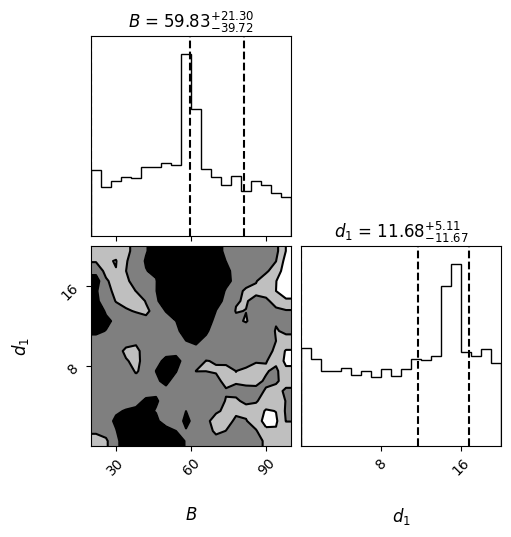

In [90]:
import numpy as np
import emcee  # Import emcee for MCMC sampling
import corner
import matplotlib.pyplot as plt  # For plotting
import math

# Constants and settings
fm = 1
hbarc = 0.197327053
g = 5.625e26 * (1e-3 * (1 / hbarc))  # gram in MeV
g_cm_3 = g / (1e13 * fm)**3  # gram / cm^3
Msun = 1.989e33 * g  # mass of sun

# Number of parameters
ndim = 2  # Number of parameters: B and d1
nwalkers = 30  # Should be at least 2 * ndim

# Initial guesses for the parameters
initial_guess = np.array([60, 15.0])  # Example initial guesses for B and d1

# Function to compute the log prior
def log_prior(params):
    B, d1 = params
    if 20 < B < 100 and 0 < d1 < 20:
        return 0.0  # Uniform prior
    return -np.inf  # Outside prior bounds

# Function to compute the likelihood
def likelihood_transform(theta):
    B, d1 = theta
    epsilon, p = MITbag_compute_EOS(B)  # Assuming MITbag_compute_EOS is defined

    probMRgaussian = likelihood.MRlikihood_Gaussian(epsilon, p, (1.4, 13, 0.07, 0.65), d1)  # Assuming this is defined
    return probMRgaussian

# Combined log probability function
def log_probability(params):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + likelihood_transform(params)

# Function to sample initial positions
def sample_initial_positions(nwalkers, ndim):
    positions = []
    while len(positions) < nwalkers:
        pos = initial_guess + 1e-2 * np.random.randn(ndim)  # Small random perturbation
        if np.isfinite(log_prior(pos)):
            positions.append(pos)
    return np.array(positions)

# Generate initial positions for the walkers
p0 = sample_initial_positions(nwalkers, ndim)

# Create the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability)

# Number of steps for MCMC
nsteps = 210  # Set to 50 as per your request

# Run MCMC
print("Running MCMC...")
sampler.run_mcmc(p0, nsteps, progress=True)
print("MCMC complete.")

# Extract the samples
samples = sampler.get_chain(flat=True)

# Create corner plot
labels = [r"$B$", r"$d_1$"]  # Adjust labels based on your parameters

figure = corner.corner(samples, labels=labels,
                       smooth=0.9,
                       label_kwargs=dict(fontsize=12),
                       title_kwargs=dict(fontsize=12),
                       quantiles=[0., 0.5, 0.84],
                       levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
                       plot_density=False,
                       plot_datapoints=False,
                       fill_contours=True,
                       show_titles=True,
                       max_n_ticks=3,
                       title_fmt='.2f')

# Save and show the corner plot
plt.savefig("corner_plot.png")
plt.show()  # Display the plot
